In [144]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pickle
import sklearn
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report

In [145]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 14

In [146]:
file_xml = "D:/du lieu o cu/Statistics and Machine Learning Course/TH3/TH3/data/Customer_Churn_02.json"
df = pd.read_json(file_xml)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [147]:
value_counts = df['Geography'].value_counts()
print(value_counts)

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


In [148]:
df = df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'])
# Check null
null_values = df.isnull().sum()
print(null_values)

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [150]:
le = LabelEncoder()

for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

print(df.head(2))

   CreditScore  Geography  Gender  Age  Tenure   Balance  NumOfProducts  \
0          619          0       0   42       2      0.00              1   
1          608          2       0   41       1  83807.86              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  


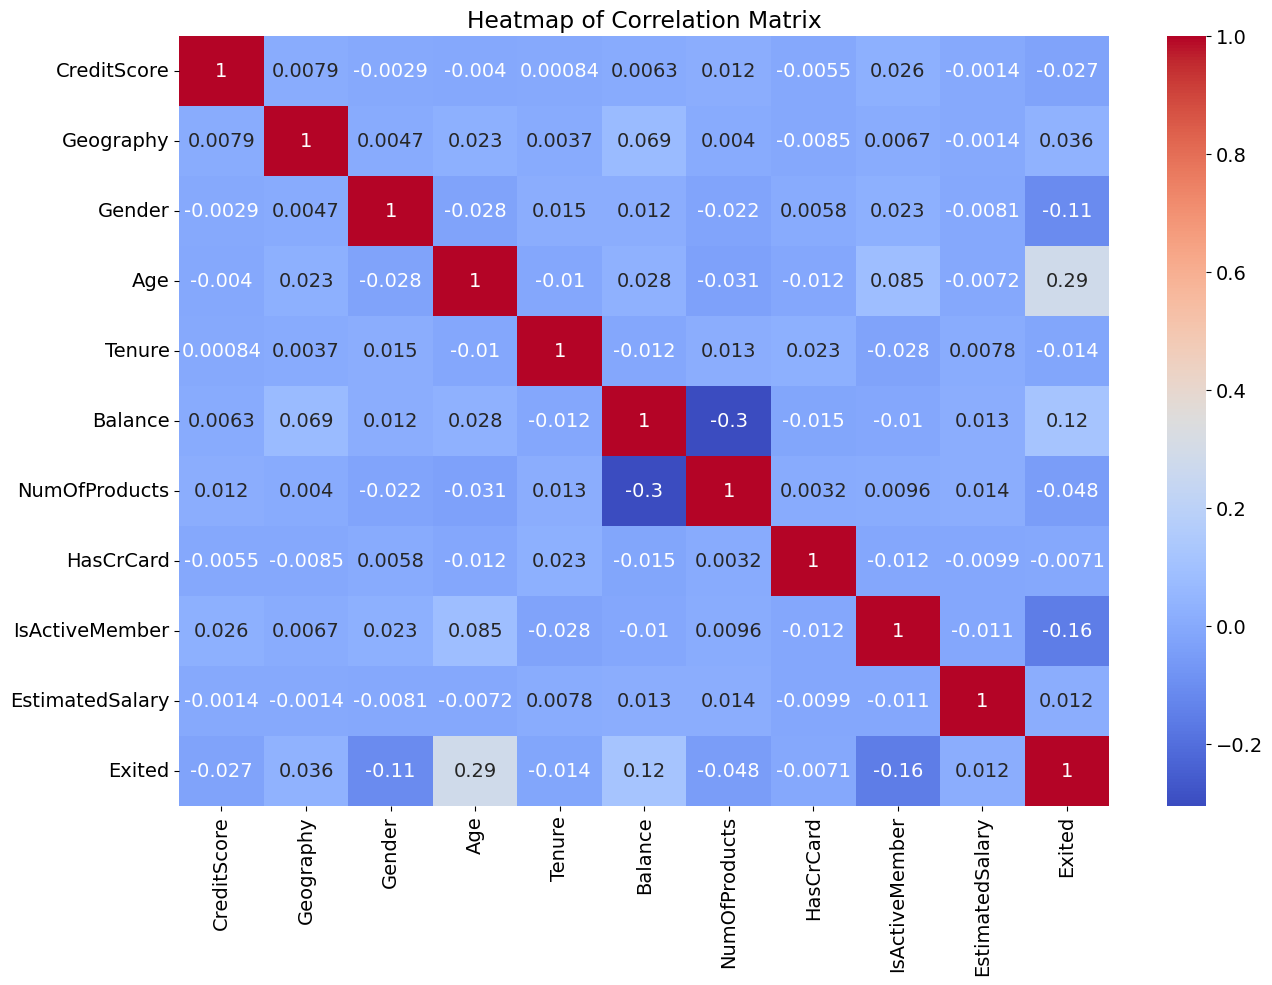

            Feature        VIF
0             const  82.118435
1       CreditScore   1.001045
2         Geography   1.006193
3            Gender   1.002330
4               Age   1.010408
5            Tenure   1.001929
6           Balance   1.109344
7     NumOfProducts   1.104614
8         HasCrCard   1.001171
9    IsActiveMember   1.009990
10  EstimatedSalary   1.000922


In [151]:
# Vẽ biểu đồ heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

# Tính VIF (Variance Inflation Factor)
X = df.drop(columns=['Exited']) 

import statsmodels.api as sm
X = sm.add_constant(X)  

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Hiển thị kết quả VIF
print(vif_data)

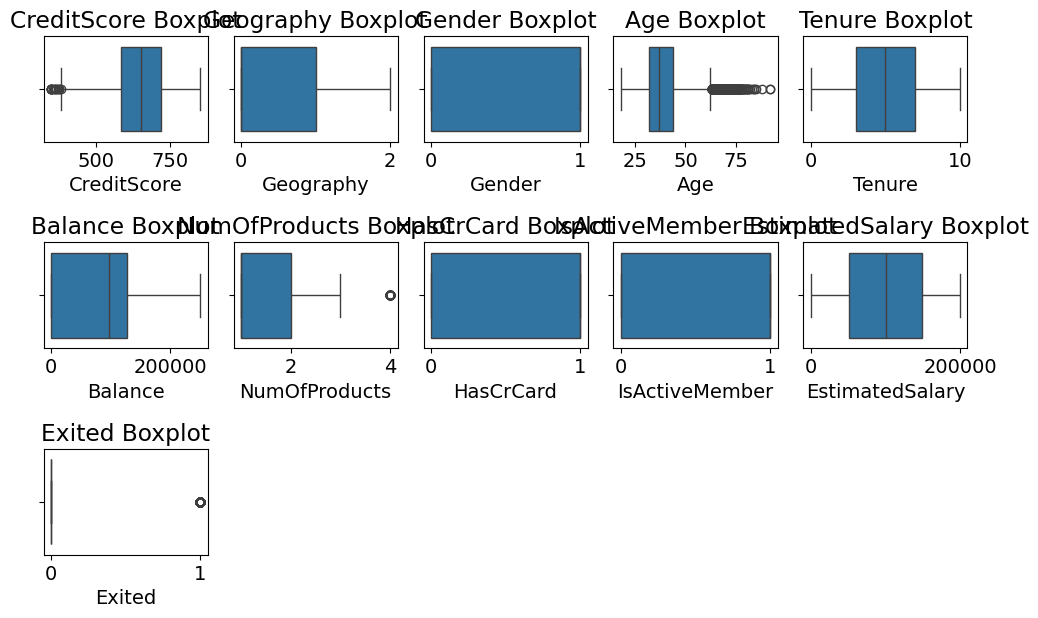

In [152]:
plt.figure(figsize=(10, 10))
for i, j in enumerate(df.describe().columns):
    plt.subplot(5,5, i+1)
    sns.boxplot(x=df[j])
    plt.title('{} Boxplot'.format(j))
    plt.tight_layout()

plt.show()

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int32  
 2   Gender           10000 non-null  int32  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int32(2), int64(7)
memory usage: 781.4 KB


In [154]:
from scipy import stats

def winsorize_columns(df, columns, lower_percentile=0.05, upper_percentile=0.95):
    for col in columns:
        df[col] = stats.mstats.winsorize(df[col], limits=[lower_percentile, 1-upper_percentile])
    return df

columns_to_winsorize = ['CreditScore', 'Age']
df_copy_temp = winsorize_columns(df, columns_to_winsorize)

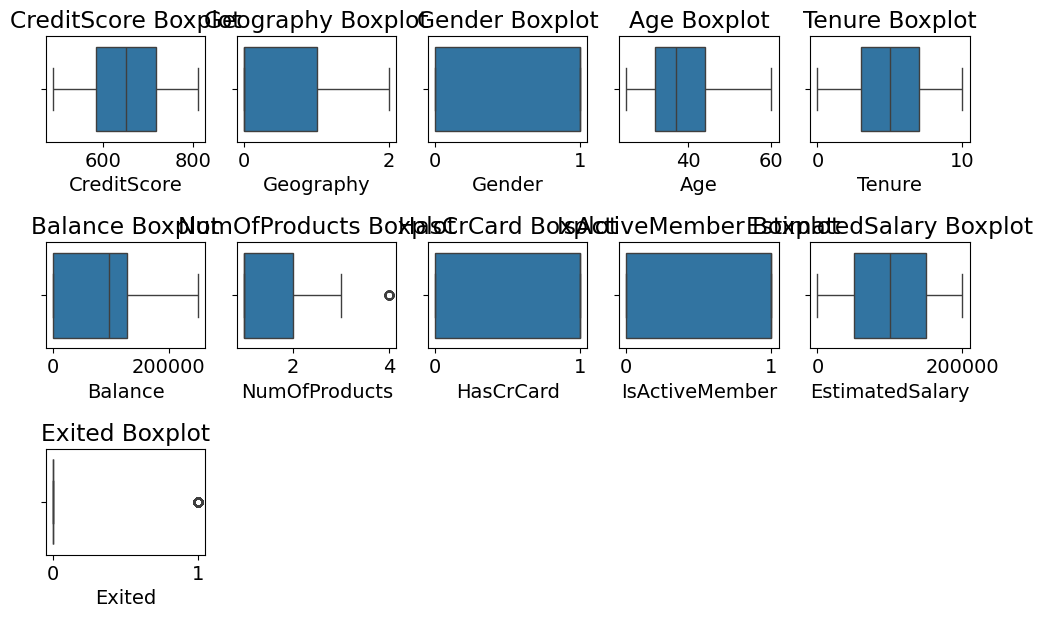

In [155]:
plt.figure(figsize=(10, 10))
for i, j in enumerate(df.describe().columns):
    plt.subplot(5,5, i+1)
    sns.boxplot(x=df[j])
    plt.title('{} Boxplot'.format(j))
    plt.tight_layout()

plt.show()

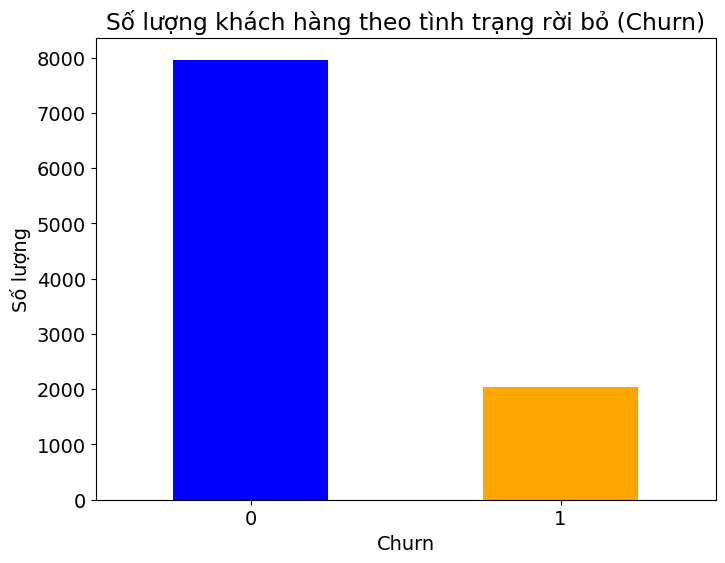

In [156]:
# Đếm số lượng từng giá trị trong cột "Churn"
churn_counts = df['Exited'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
churn_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Số lượng khách hàng theo tình trạng rời bỏ (Churn)')
plt.xlabel('Churn')
plt.ylabel('Số lượng')
plt.xticks(rotation=0)
plt.show()

In [157]:
!pip install imblearn



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [158]:
# Shuffle toàn bộ DataFrame
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [159]:
X = df.drop('Exited', axis = 'columns')
y = df['Exited']

In [160]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

smote = SMOTEENN(random_state=42)

# Apply SMOTE to balance the classes
X_res, y_res = smote.fit_resample(X, y)

# Check the new class distribution
print("Class distribution after SMOTE:", y_res.value_counts())

Class distribution after SMOTE: Exited
1    3611
0    2977
Name: count, dtype: int64


In [161]:
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
X_res[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']] = standard_scaler.fit_transform(X_res[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']])
X_res[['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']] = minmax_scaler.fit_transform(X_res[['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']])

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [163]:
# Fit model
model = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

#Prediction
y_pred = model.predict(X_test)

# Evaluation metrics
class_report = classification_report(y_test, y_pred)
cf = confusion_matrix(y_test, y_pred)
print(class_report)
print(cf)


              precision    recall  f1-score   support

           0       0.80      0.79      0.80       626
           1       0.81      0.83      0.82       692

    accuracy                           0.81      1318
   macro avg       0.81      0.81      0.81      1318
weighted avg       0.81      0.81      0.81      1318

[[493 133]
 [120 572]]


In [164]:
k_fold = cross_val_score(model, X_res, y_res, cv=5, scoring='accuracy')
print(class_report)
print(cf)
print(k_fold)

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       626
           1       0.81      0.83      0.82       692

    accuracy                           0.81      1318
   macro avg       0.81      0.81      0.81      1318
weighted avg       0.81      0.81      0.81      1318

[[493 133]
 [120 572]]
[0.7245827  0.79893778 0.82169954 0.81397115 0.82004556]


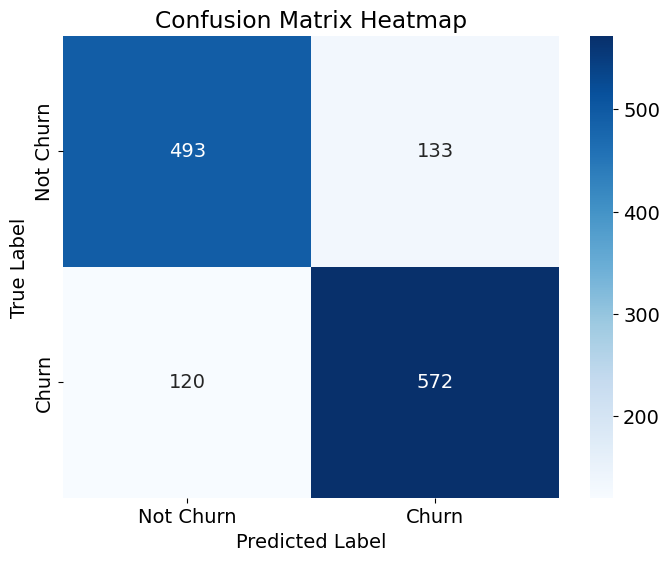

In [165]:
# Vẽ heatmap cho confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

LOGISTIC REGRESSION

In [166]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000, random_state=42).fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [167]:
lr_report = classification_report(y_test, y_pred_lr, target_names=['Class 0', 'Class 1'])
print(lr_report)

              precision    recall  f1-score   support

     Class 0       0.79      0.77      0.78       626
     Class 1       0.79      0.81      0.80       692

    accuracy                           0.79      1318
   macro avg       0.79      0.79      0.79      1318
weighted avg       0.79      0.79      0.79      1318



In [168]:
k_fold = cross_val_score(lr_model, X_res, y_res, cv=5, scoring='accuracy')
print(class_report)
print(cf)
print(k_fold)

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       626
           1       0.81      0.83      0.82       692

    accuracy                           0.81      1318
   macro avg       0.81      0.81      0.81      1318
weighted avg       0.81      0.81      0.81      1318

[[493 133]
 [120 572]]
[0.67754173 0.78679818 0.82094082 0.81321185 0.80713743]


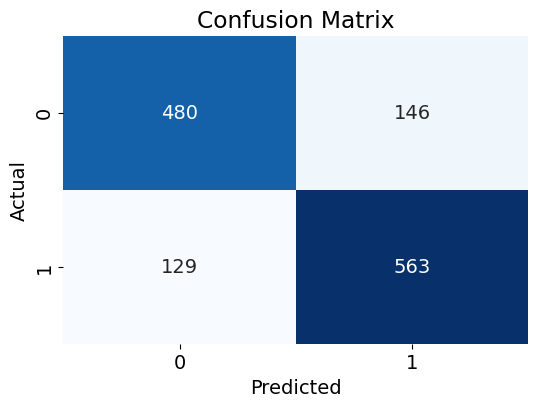

In [169]:
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_lr, annot=True, fmt='g', cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [170]:
# Get results
intercept = lr_model.intercept_
coef = lr_model.coef_
score = lr_model.score(X_train, y_train)
prob_matrix = lr_model.predict_proba(X_train)
print(f"intercept: {intercept}")
print(f"coef: {coef}")
print(f"score: {score}")
print(f"prob_matrix: {prob_matrix}")

intercept: [2.04555006]
coef: [[-0.01330207 -0.29536361 -1.32647711  0.95202394 -0.1674167   0.61707982
  -1.19939442 -0.60333832 -1.74252942  0.04372521]]
score: 0.7855787476280834
prob_matrix: [[0.30506655 0.69493345]
 [0.74644621 0.25355379]
 [0.1727268  0.8272732 ]
 ...
 [0.48722856 0.51277144]
 [0.30484889 0.69515111]
 [0.10998065 0.89001935]]
